In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib
import numpy as np
import scipy.stats
%matplotlib inline

## Plotting Functions

In [2]:
# Formatting Code (copied from Ellis)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

In [38]:
def plot_line(ax, x, y, color, label, errors=None):
    if color == "orange":
        hexcode = "#F79646"
    elif color == "purple":
        hexcode = "#8064A2"
    elif color == "teal":
        hexcode = "#4BACC6"
    elif color == "light teal":
        hexcode = "#93CDDD"
    else:
        hexcode = "#000000"
    ax.plot(x, y, label=label, color=hexcode, linewidth=1)
    if errors is not None:
        ax.fill_between(x, y - errors, y + errors, color=hexcode, alpha=0.2)

In [55]:
## Copied from Gokul's HRI 2019 Submission

def make_line_plot(xs, ys, colors, labels, xlabel, ylabel, title, savetitle):
    fig = plt.figure(dpi=200)
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    for model_idx in range(len(xs)):
        x = xs[model_idx]
        y = ys[model_idx]
        plot_line(ax, x, y, colors[model_idx], labels[model_idx], None)
    
    plt.xlabel(xlabel, fontsize=22)
    ext = plt.ylabel(ylabel, fontsize=22)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 22)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 22)
    plt.title(title,  y=1.06, fontsize=24)
    ax.legend(bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=3, fontsize=17)
    plt.savefig(savetitle + ".jpg", dpi=200, bbox_extra_artists=(ext,), bbox_inches='tight')

## Making Plots

In [6]:
fp = 'data/'
agent_rewards = []
ddpg_points = []
maddpg_points = []
ddpg_rewards = []
maddpg_rewards = []
for i in range(1, 10):
    agent_rewards.append(np.load(fp + 'agent_rewards_ddpg_%d.npy' % i))
    ddpg_points.append(np.load(fp + 'ddpg_points_ddpg_%d.npy' % i))
    maddpg_points.append(np.load(fp + 'maddpg_points_ddpg_%d.npy' % i))
    ddpg_rewards.append(np.load(fp + 'ddpg_rewards_ddpg_%d.npy' % i))
    maddpg_rewards.append(np.load(fp + 'maddpg_rewards_ddpg_%d.npy' % i))

In [52]:
def moving_avg(a, n=100) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

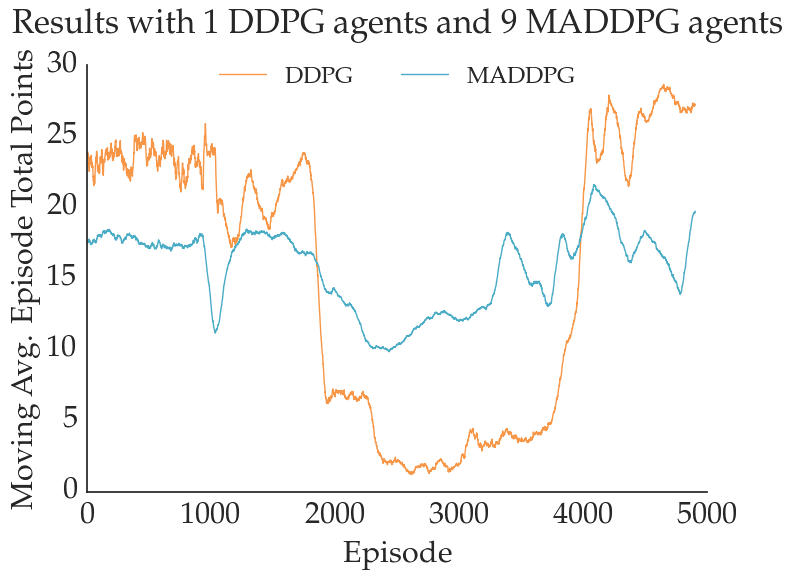

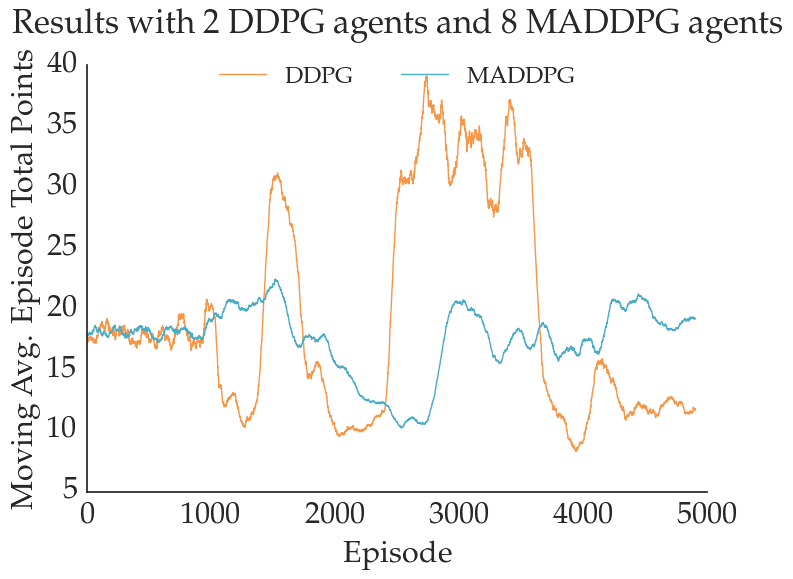

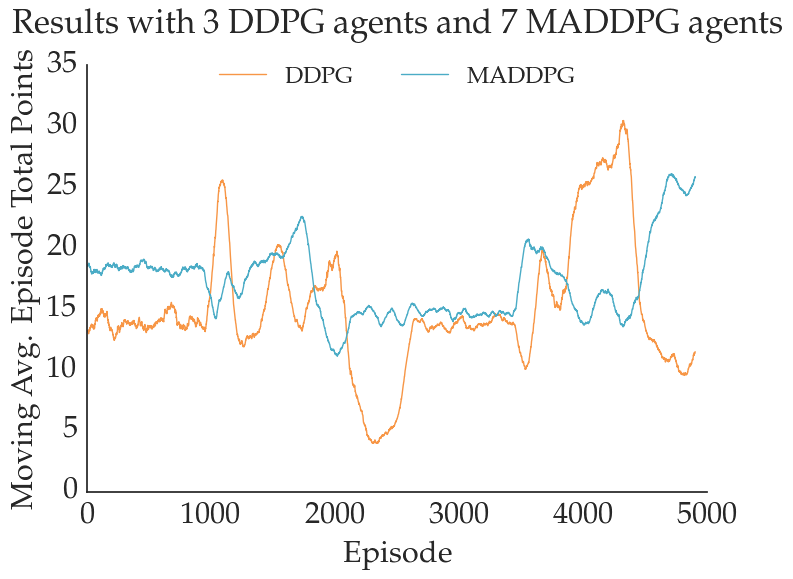

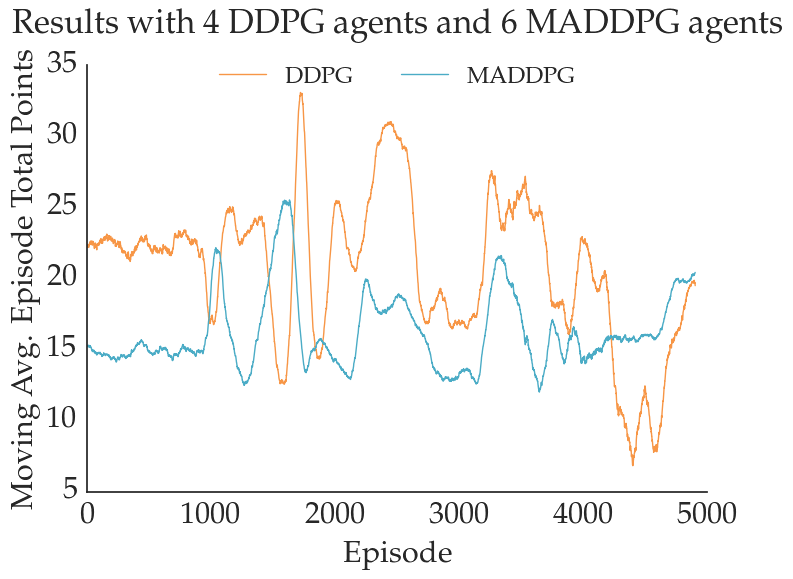

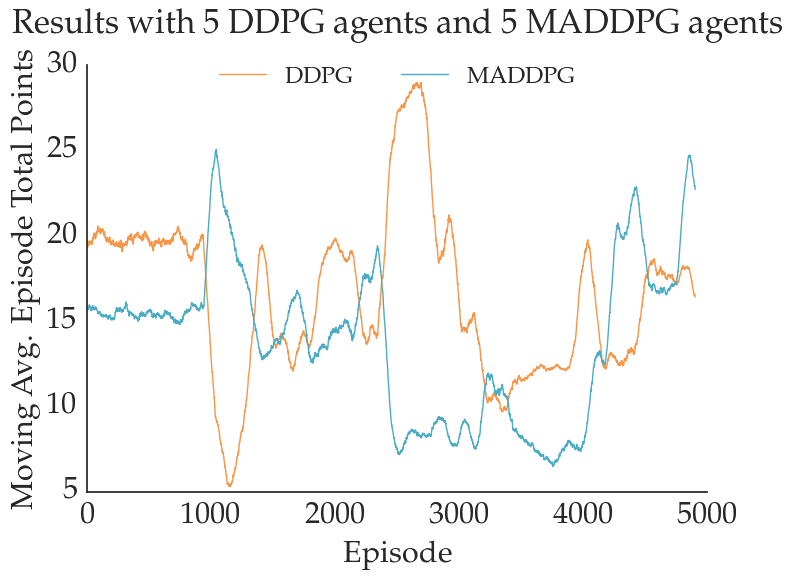

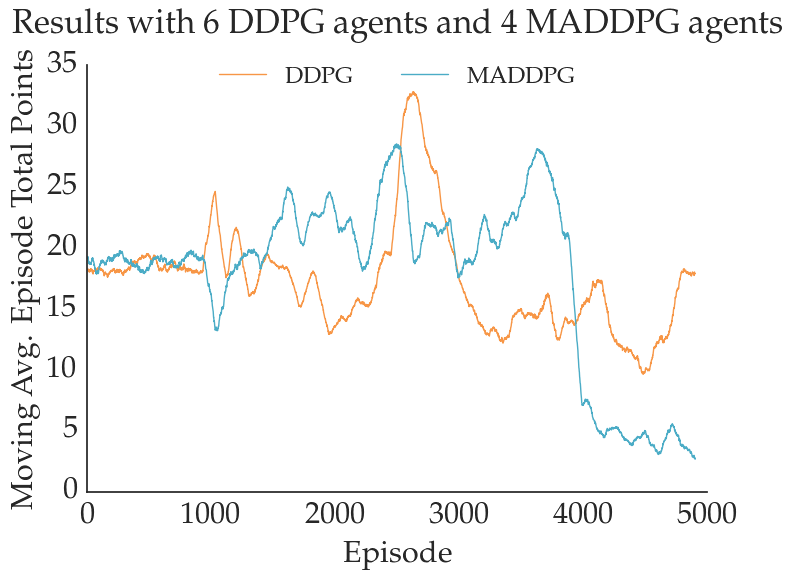

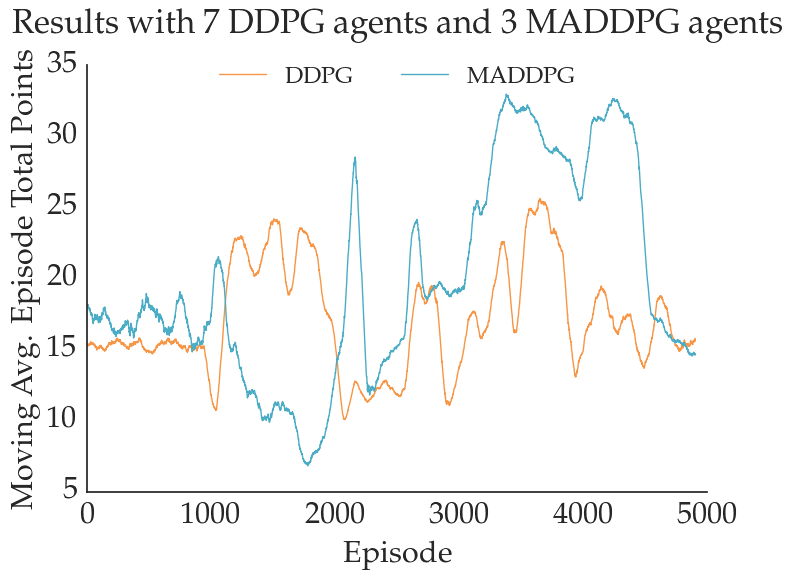

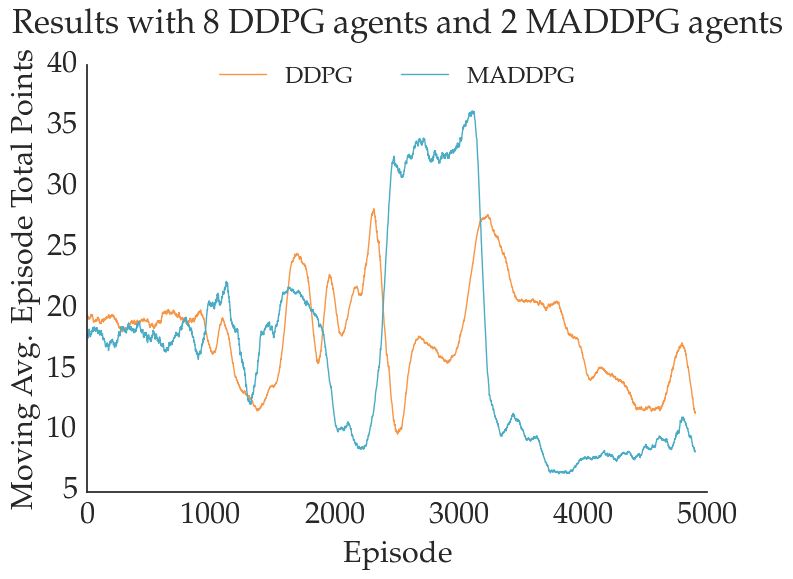

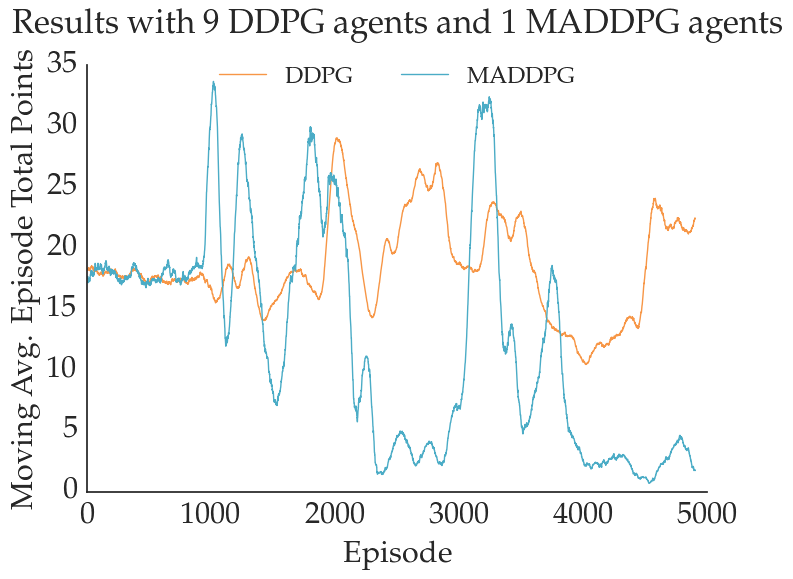

In [56]:
for num_ddpg in range(1, 10):
    idx = [i for i in range(len(ddpg_points[num_ddpg-1])) if i % 10 == 9]
    ys = [moving_avg(ddpg_points[num_ddpg-1][idx]),
         moving_avg(maddpg_points[num_ddpg-1][idx])]
    xs = [list(range(len(ys[0]))), list(range(len(ys[1])))]
    colors = ["orange", "teal"]
    labels = ["DDPG", "MADDPG"]
    xlabel = "Episode"
    ylabel = "Moving Avg. Episode Total Points"
    title = "Results with %d DDPG agents and %d MADDPG agents" % (num_ddpg, 10-num_ddpg)
    make_line_plot(xs, ys, colors, labels, xlabel, ylabel, title, savetitle=("plots/points%d" % num_ddpg))

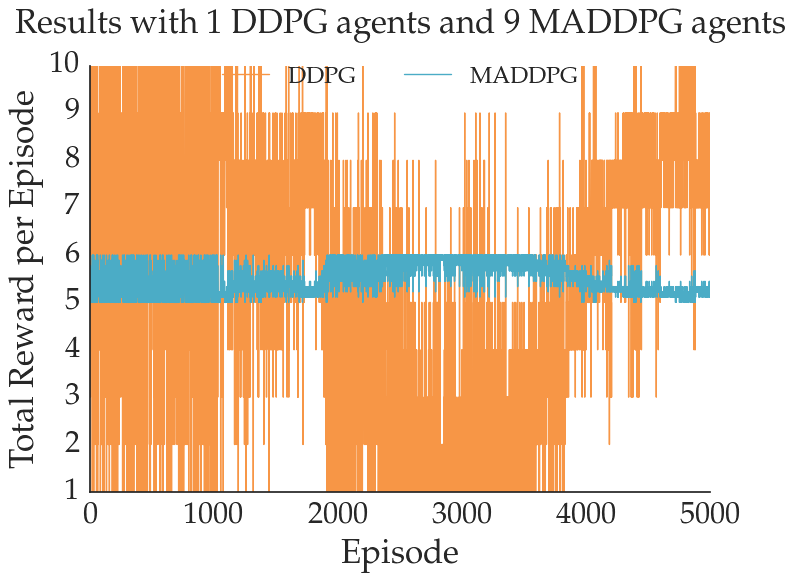

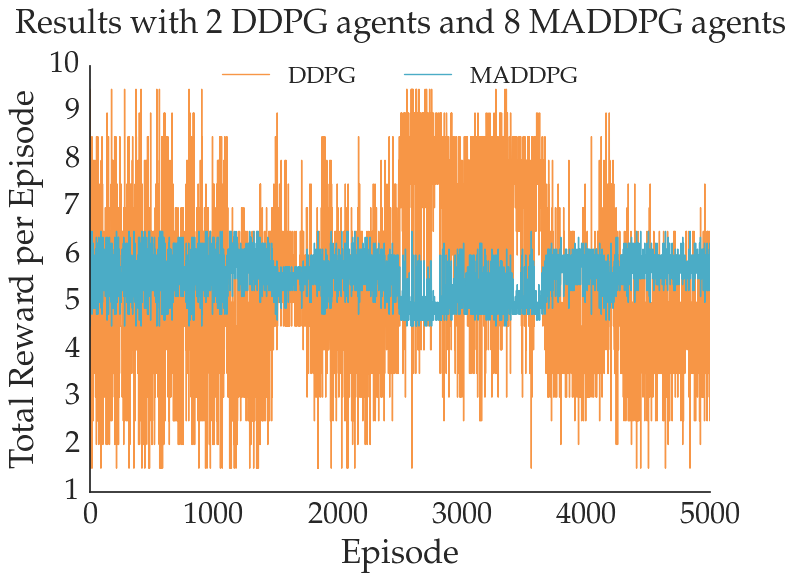

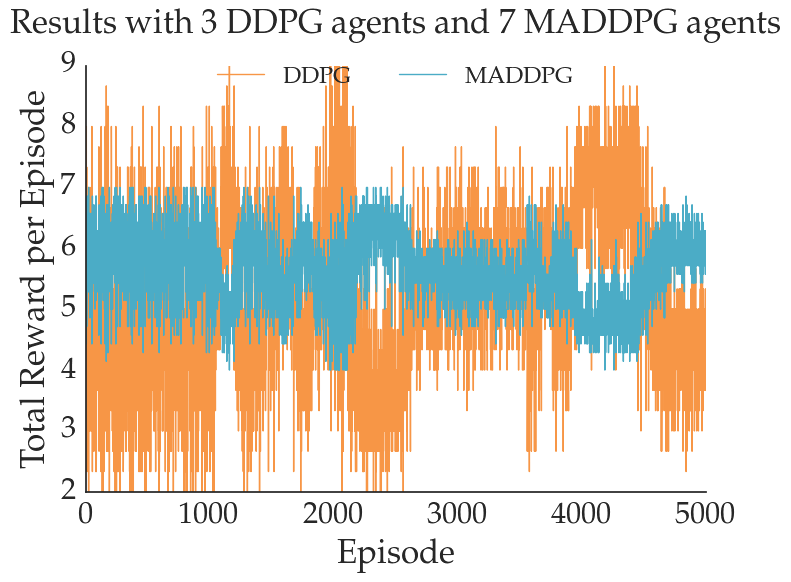

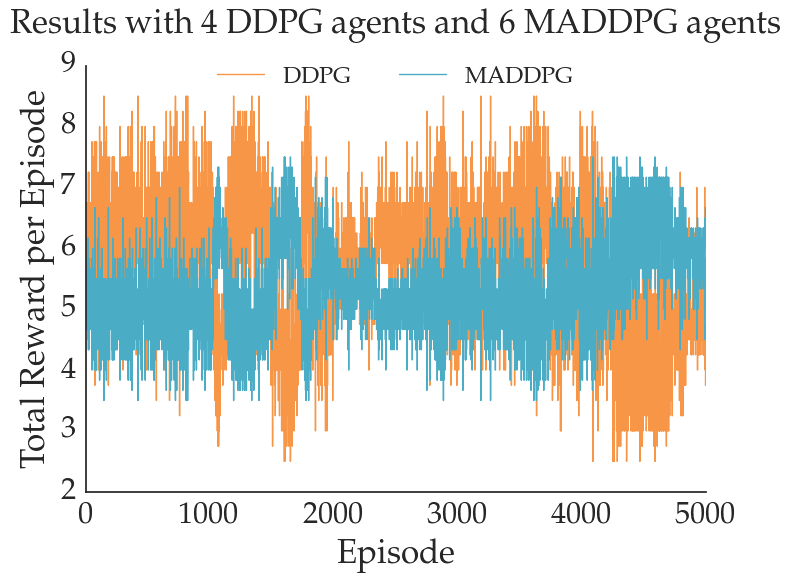

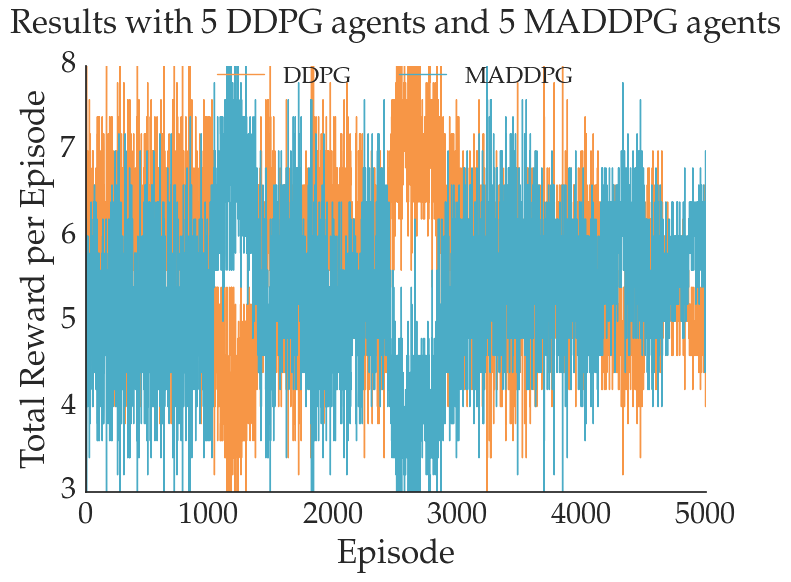

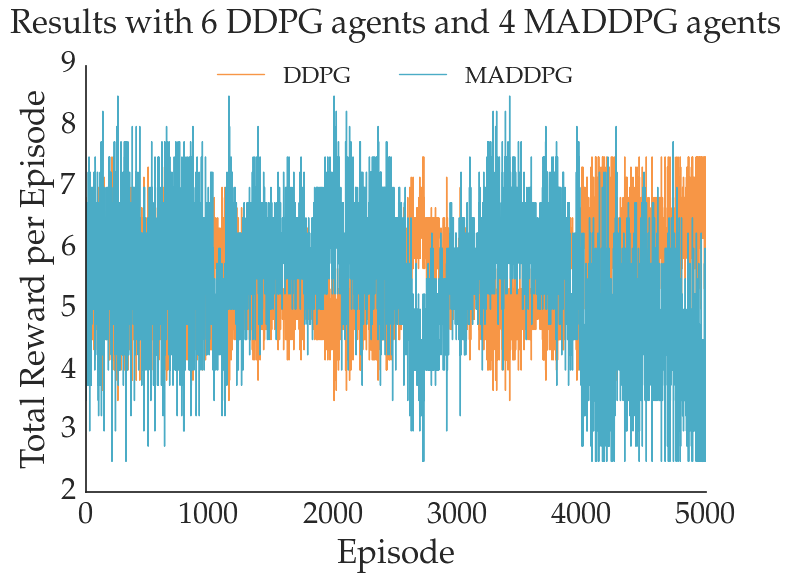

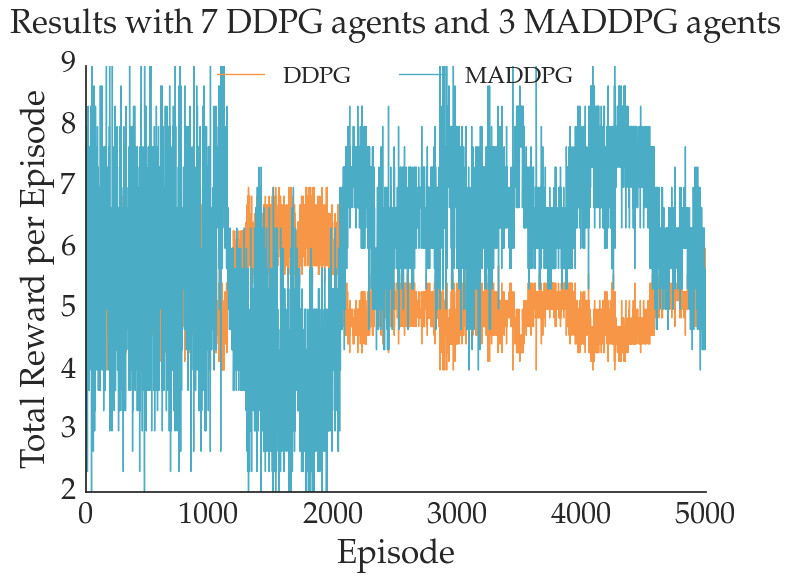

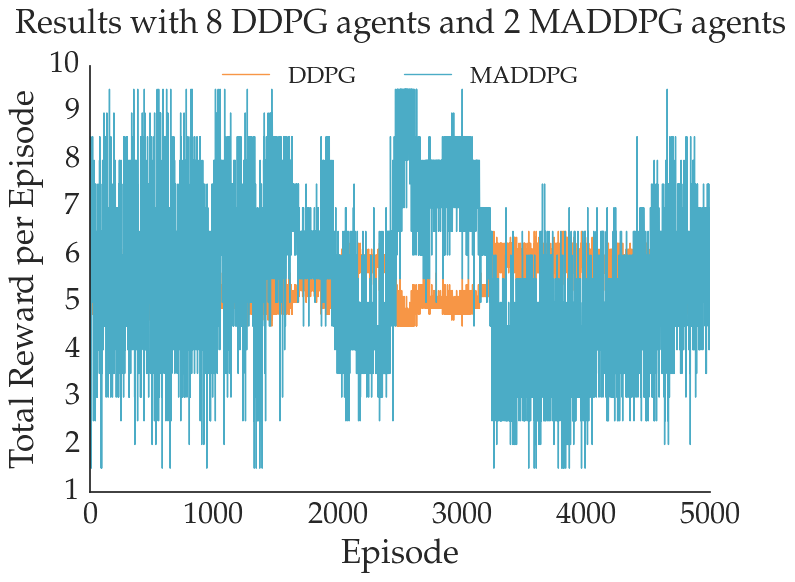

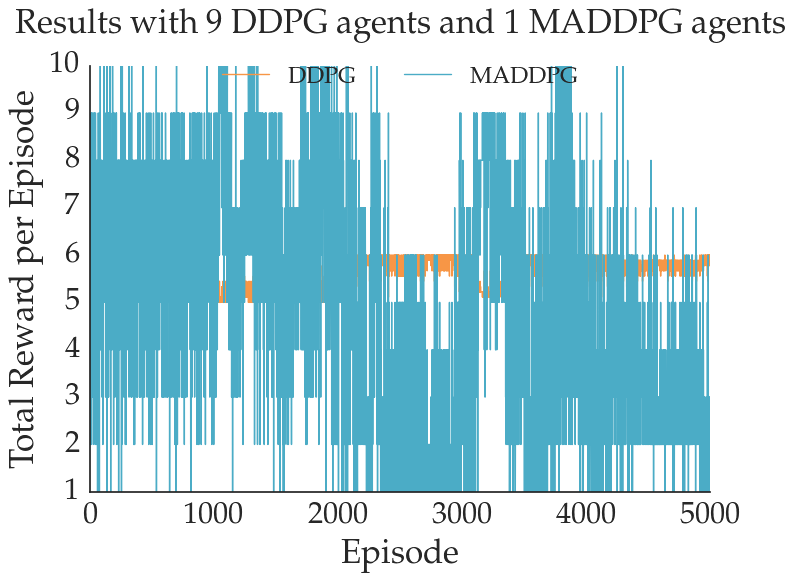

In [47]:
for num_ddpg in range(1, 10):
    ys = [ddpg_rewards[num_ddpg-1], maddpg_rewards[num_ddpg-1]]
    xs = [list(range(len(ys[0]))), list(range(len(ys[1])))]
    colors = ["orange", "teal"]
    labels = ["DDPG", "MADDPG"]
    xlabel = "Episode"
    ylabel = "Moving Avg. Reward"
    title = "Results with %d DDPG agents and %d MADDPG agents" % (num_ddpg, 10-num_ddpg)
    make_line_plot(xs, ys, colors, labels, xlabel, ylabel, title, savetitle=("plots/rewards%d" % num_ddpg))